In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance

In [2]:
data = pd.read_csv('tennis.csv')
df = pd.DataFrame(data)
df.shape

(8001, 27)

In [3]:
df.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender,ID
0,4,1,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,...,0.705435,12.5628,2.0724,True,F,0.445318,False,UE,mens,8644
1,4,2,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,...,3.856600,12.3544,5.1124,False,B,0.432434,False,FE,mens,1182
2,23,1,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,...,2.908892,13.8620,1.6564,False,F,0.397538,True,FE,mens,9042
3,9,1,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,...,0.557554,14.2596,0.1606,True,B,0.671984,True,UE,mens,1222
4,4,1,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,...,3.945317,11.3658,1.1082,False,F,0.340411,False,W,mens,4085


In [4]:
df.describe()

,rally,serve,speed,net.clearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,previous.speed,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,previous.time.to.net,ID
count,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000
mean,5.966004,1.398700,30.806938,0.629658,1.467630,4.421146,2.690463,11.899694,1.919544,12.253954,1.213795,28.763676,0.821562,2.193420,4.218717,12.616810,2.367952,0.549988,5004.917260
std,3.548182,0.489661,7.298917,0.982504,1.108697,3.144965,1.713136,2.788231,1.205449,2.039085,0.964364,6.477470,0.674663,1.038942,2.052946,2.075401,1.313927,0.186788,2895.018795
min,3.000000,1.000000,5.176078,-0.998184,0.000497,0.003135,0.000000,2.156000,0.000200,1.389800,0.000400,8.449117,0.028865,0.000164,0.000467,2.161200,0.000200,0.003201,1.000000
25%,3.000000,1.000000,26.770290,-0.027092,0.539500,1.641161,1.444233,11.221400,0.942400,11.374200,0.551800,24.033218,0.404815,1.354458,2.733674,12.082400,1.352200,0.432164,2500.000000
50%,5.000000,1.000000,32.417690,0.445870,1.210847,3.860266,2.360894,12.691800,1.829400,12.551600,0.983800,29.793417,0.658382,2.168822,4.126864,12.901600,2.332000,0.507559,4996.000000
75%,7.000000,2.000000,35.681431,0.970844,2.215955,7.029345,3.565853,13.553000,2.745200,13.498000,1.596600,33.581003,1.021397,3.022677,5.595515,13.712800,3.259000,0.624135,7523.000000
max,38.000000,2.000000,55.052795,12.815893,7.569757,11.886069,14.480546,18.125600,7.746200,18.745800,9.352600,54.207506,6.730275,4.114361,9.997963,20.211000,6.852600,1.635257,10000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8001 entries, 0 to 8000
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   rally                               8001 non-null   int64  
 1   serve                               8001 non-null   int64  
 2   hitpoint                            8001 non-null   object 
 3   speed                               8001 non-null   float64
 4   net.clearance                       8001 non-null   float64
 5   distance.from.sideline              8001 non-null   float64
 6   depth                               8001 non-null   float64
 7   outside.sideline                    8001 non-null   bool   
 8   outside.baseline                    8001 non-null   bool   
 9   player.distance.travelled           8001 non-null   float64
 10  player.impact.depth                 8001 non-null   float64
 11  player.impact.distance.from.center  8001 no

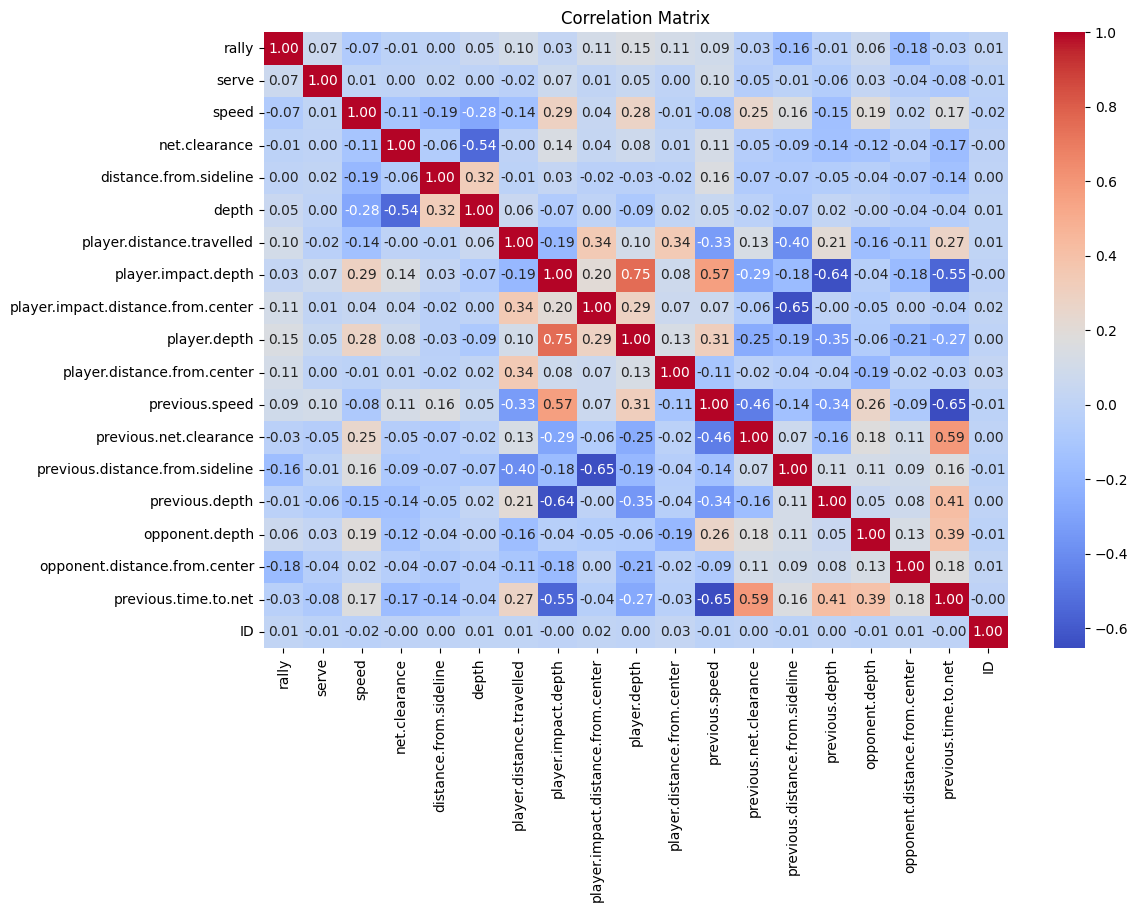

In [6]:
numerical_data = df.select_dtypes(include = [np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numerical_data.corr(), annot = True, fmt= '.2f', cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

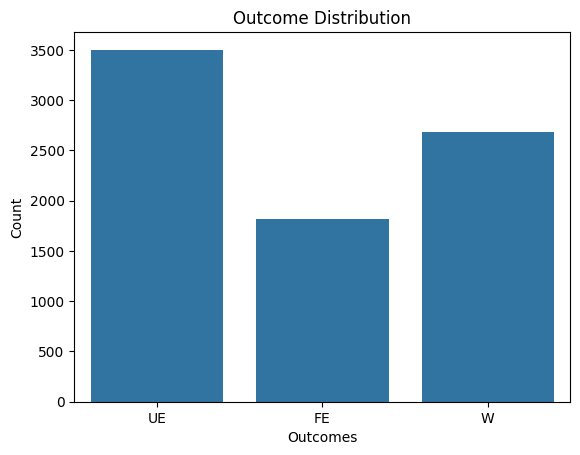

Number of UE:  3501
Number of FE:  1818
Number of W:  2682


In [7]:
sns.countplot(x = df['outcome'])
plt.title('Outcome Distribution')
plt.xlabel("Outcomes")
plt.ylabel("Count")
plt.show()

outcome_counts = df['outcome'].value_counts()
print("Number of UE: ", outcome_counts.get('UE'))
print("Number of FE: ", outcome_counts.get('FE'))
print("Number of W: ", outcome_counts.get('W'))

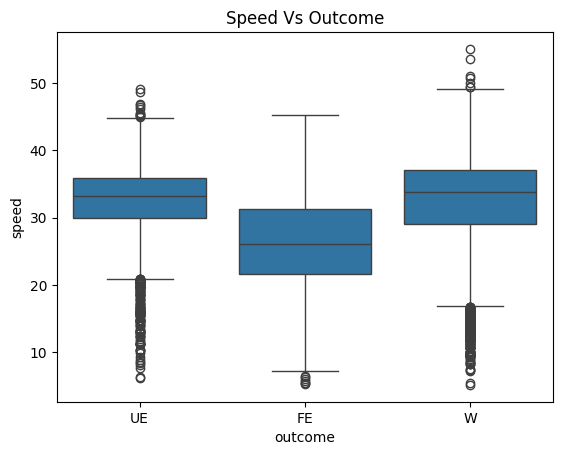

outcome
FE    26.058986
UE    32.397789
W     31.948701
Name: speed, dtype: float64


In [8]:
sns.boxplot(x = 'outcome', y= 'speed', data = df)
plt.title("Speed Vs Outcome")
plt.show()

mean_speeds = df.groupby('outcome')['speed'].mean()
print(mean_speeds)

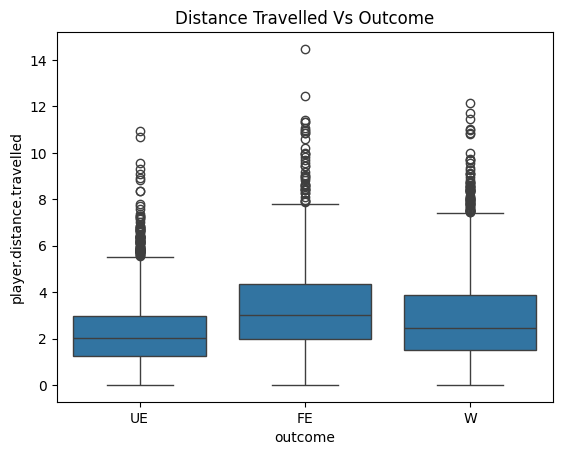

outcome
FE    3.314124
UE    2.238020
W     2.858319
Name: player.distance.travelled, dtype: float64


In [9]:
sns.boxplot(x = 'outcome', y= 'player.distance.travelled', data = df)
plt.title("Distance Travelled Vs Outcome")
plt.show()

mean_speeds = df.groupby('outcome')['player.distance.travelled'].mean()
print(mean_speeds)

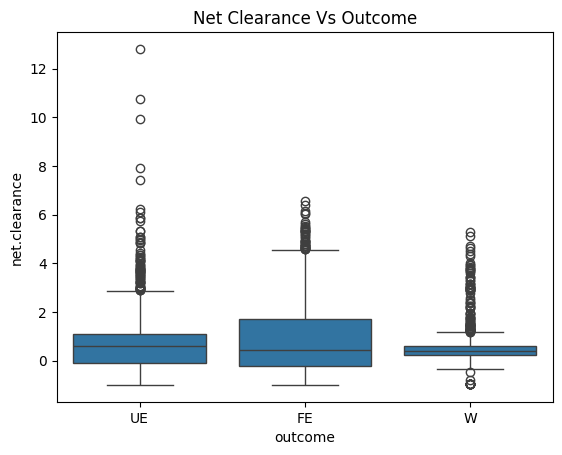

outcome
FE    0.863398
UE    0.618109
W     0.486292
Name: net.clearance, dtype: float64


In [10]:
sns.boxplot(x = 'outcome', y= 'net.clearance', data = df)
plt.title("Net Clearance Vs Outcome")
plt.show()

mean_clearance = df.groupby('outcome')['net.clearance'].mean()
print(mean_clearance)

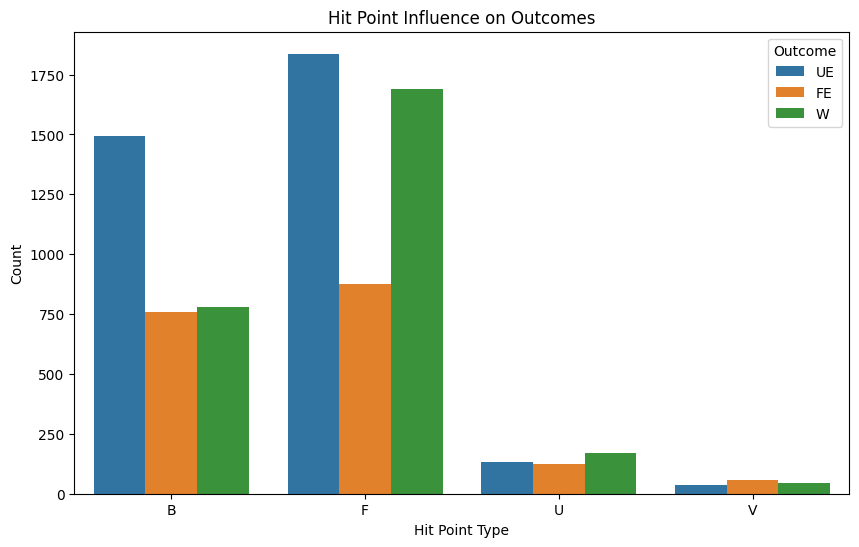

outcome         FE        UE         W
hitpoint                              
B         0.250494  0.492749  0.256757
F         0.199000  0.417310  0.383689
U         0.291375  0.312354  0.396270
V         0.419118  0.257353  0.323529


In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hitpoint', hue='outcome', data=df)
plt.title('Hit Point Influence on Outcomes')
plt.xlabel('Hit Point Type')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.show()


hitpoint_outcome_counts = df.groupby('hitpoint')['outcome'].value_counts(normalize=True).unstack()
print(hitpoint_outcome_counts)  

In [12]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

df = pd.get_dummies(df, columns=['hitpoint', 'previous.hitpoint'], drop_first=True)

In [13]:
features = df.drop(columns=['outcome'])
target = df['outcome']
target = target.map({'W':1,'UE':0,'FE':0})

In [14]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, target, test_size=0.2, random_state=42)


In [16]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

In [17]:
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
print(results_df)

                 Model  Accuracy
0  Logistic Regression  0.930044
1        Decision Tree  0.957527
2        Random Forest  0.964397
3    Gradient Boosting  0.963148
4                  SVM  0.942536
5                  KNN  0.885696
6       Neural Network  0.936290


In [18]:
evaluation_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    evaluation_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

evaluation_df = pd.DataFrame(evaluation_results).T
print(evaluation_df)


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.930044   0.930383  0.930044  0.930187
Decision Tree        0.957527   0.957485  0.957527  0.957504
Random Forest        0.964397   0.964379  0.964397  0.964388
Gradient Boosting    0.963148   0.963322  0.963148  0.963214
SVM                  0.942536   0.942824  0.942536  0.942654
KNN                  0.885696   0.891581  0.885696  0.887278
Neural Network       0.936290   0.936359  0.936290  0.936323


In [19]:
#Permutation Importance

x_train = pd.DataFrame(X_train, columns=df.drop('outcome', axis=1).columns)
x_test = pd.DataFrame(X_test, columns=df.drop('outcome', axis=1).columns)
Model = RandomForestClassifier(n_estimators=100)
Model.fit(x_train, y_train)
perm_importance = permutation_importance(Model, x_test, y_test, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': perm_importance.importances_mean
})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
top_5_features_perm = perm_importance_df.head(5)
print(top_5_features_perm)

                   Feature  Importance
3            net.clearance    0.182386
6         outside.sideline    0.133229
7         outside.baseline    0.103810
4   distance.from.sideline    0.016052
13          previous.speed    0.003560


In [24]:
# feature importance

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)
feature_importances = rf_model.feature_importances_


feature_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
})


feature_df = feature_df.sort_values(by='Importance', ascending=False)


top_5_features_rf = feature_df.head(5)
print(top_5_features_rf)



               Feature  Importance
3        net.clearance    0.227746
6     outside.sideline    0.156720
7     outside.baseline    0.118673
9  player.impact.depth    0.072741
5                depth    0.062358


In [21]:
# Coefficient
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)


coefficients = lr_model.coef_[0]


coeff_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
})


coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].apply(np.abs)
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)


top_5_features_lr = coeff_df.head(5)
print(top_5_features_lr)

                  Feature  Coefficient  Abs_Coefficient
6        outside.sideline    -3.029545         3.029545
7        outside.baseline    -2.690811         2.690811
5                   depth    -1.917816         1.917816
4  distance.from.sideline    -0.943790         0.943790
9     player.impact.depth    -0.736704         0.736704
